Dataset loaded successfully from URL.
Dataset Shape: (5572, 2)
First 5 rows of the dataset:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Label Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


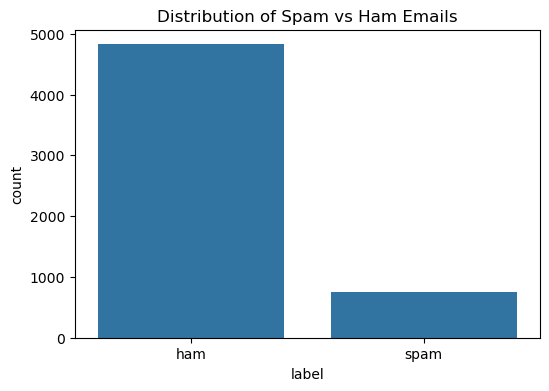

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Sample Cleaned Messages:


,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though



Model Accuracy: 0.9811659192825112

Confusion Matrix:
[[965   1]
 [ 20 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
# Spam Email Detection - Jupyter Notebook
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load the Dataset
# Using the SMS Spam Collection dataset from UCI Machine Learning Repository
url = "https://raw.githubusercontent.com/Lydiah6470/Spam_Email_Detection/main/SMSSpamCollection"

try:
    # Attempt to load the dataset from the URL
    df = pd.read_csv(url, sep='\t', names=['label', 'message'])
    print("Dataset loaded successfully from URL.")
    print("Dataset Shape:", df.shape)
except Exception as e:
    print(f"Error loading dataset from URL: {e}")
    print("Attempting to load dataset locally...")

    try:
        # Fallback: Load the dataset from a local file
        df = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label', 'message'])
        print("Dataset loaded successfully from local file.")
        print("Dataset Shape:", df.shape)
    except Exception as e:
        print(f"Error loading dataset locally: {e}")
        print("Please ensure the file 'SMSSpamCollection.txt' is in the same directory as this notebook.")
        df = None  # Set df to None if both attempts fail

# Check if dataset is loaded
if df is None:
    print("Dataset not loaded. Please fix the URL or upload the dataset manually.")
else:
    # Display the first few rows of the dataset
    print("First 5 rows of the dataset:")
    display(df.head())

if df is not None:
    # Step 2: Data Exploration
    print("\nLabel Distribution:")
    print(df['label'].value_counts())

    # Visualize label distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df)
    plt.title('Distribution of Spam vs Ham Emails')
    plt.show()

if df is not None:
    # Step 3: Data Preprocessing
    # Convert labels to binary values (0 for 'ham', 1 for 'spam')
    df['label'] = df['label'].map({'ham': 0, 'spam': 1})

    # Text preprocessing
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    import re

    nltk.download('stopwords')
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z]', ' ', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize and stem words
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words if word not in stop_words]
        return ' '.join(stemmed_words)

    # Apply preprocessing to the 'message' column
    df['clean_message'] = df['message'].apply(preprocess_text)

    # Display cleaned messages
    print("\nSample Cleaned Messages:")
    display(df[['message', 'clean_message']].head())

if df is not None:
    # Step 4: Feature Extraction
    tfidf = TfidfVectorizer(max_features=3000)
    X = tfidf.fit_transform(df['clean_message']).toarray()
    y = df['label']

if df is not None:
    # Step 5: Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if df is not None:
    # Step 6: Model Development
    model = MultinomialNB()
    model.fit(X_train, y_train)

if df is not None:
    # Step 7: Model Evaluation
    y_pred = model.predict(X_test)
    print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))